##***House Price Prediction***

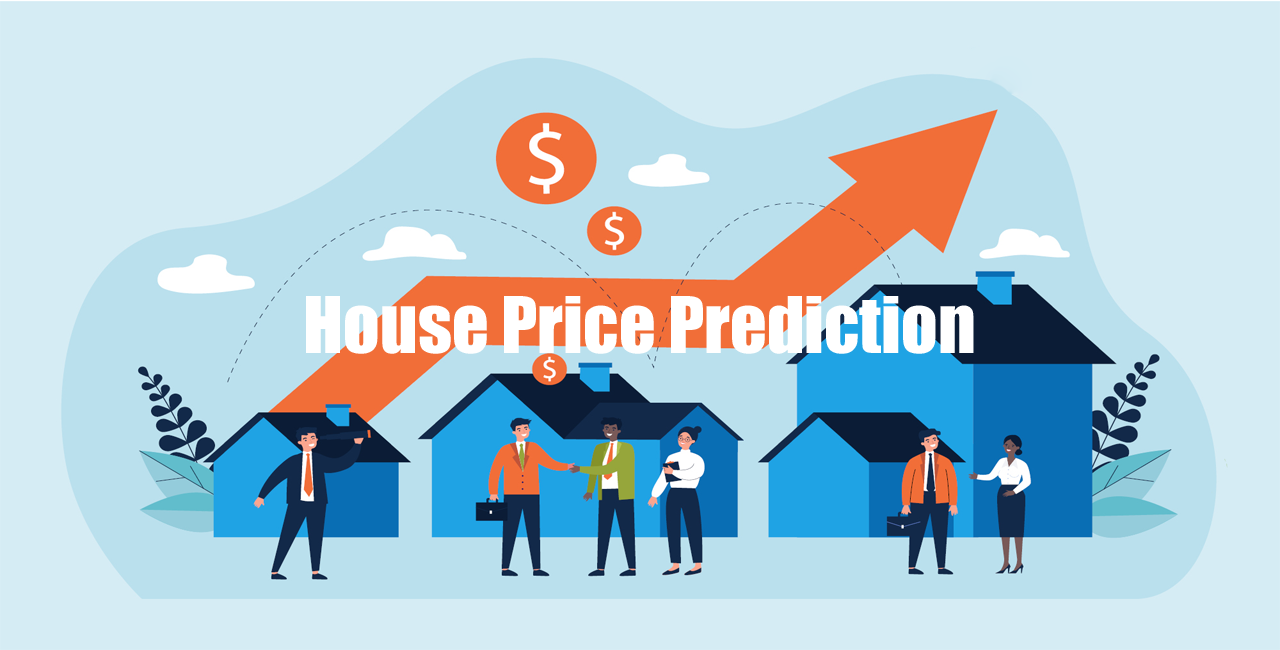

In [105]:
from IPython.display import Image, display
Image('/content/House_price_image2.png')

##Import all the Necessary modulus

In [106]:
# Linear algebra functions
import numpy as np
# manipulation of data and load the data
import pandas as pd
# Plotting library graph
import matplotlib.pyplot as plt
# Data visualization library based on matplotlib
import seaborn as sns
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split,GridSearchCV
# Standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
# RandomForestClassifier is an ensemble learning method for classification
from sklearn.ensemble import RandomForestClassifier
# Metrics to evaluate the performance of the classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
# LogisticRegression is a classification algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
# GradientBoostingClassifier is an ensemble learning method for classification
from sklearn.ensemble import GradientBoostingClassifier
# SVC is a Support Vector Classification algorithm
from sklearn.svm import SVR
# KNeighborsClassifier is a k-nearest neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
# GaussianNB is a Naive Bayes classification algorithm
from sklearn.naive_bayes import GaussianNB
# LinearRegression is a classification algorithm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# DecisionTreeClassifier is a tree-based classification algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import folium
from folium.plugins import HeatMap
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

##Load dataset of Housing Price of india

In [107]:
df=pd.read_csv('/content/House Price India.csv')
df.head()

,id,Date,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,No of views,house condition,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,No of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [108]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14619 non-null  int64  
 1   Date                            14619 non-null  int64  
 2   No of bedrooms                  14619 non-null  int64  
 3   No of bathrooms                 14619 non-null  float64
 4   living area                     14619 non-null  int64  
 5   lot area                        14619 non-null  int64  
 6   No of floors                    14619 non-null  float64
 7   waterfront present              14619 non-null  int64  
 8   No of views                     14619 non-null  int64  
 9   house condition                 14619 non-null  int64  
 10  house grade                     14619 non-null  int64  
 11  house area(excluding basement)  14619 non-null  int64  
 12  Area of the basement            

In [109]:
df.describe()

,id,Date,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,No of views,house condition,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,No of schools nearby,Distance from the airport,Price
count,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,6.762821e+09,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,6.237162e+03,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [110]:
#check the null values
df.isnull().sum()

id                                0
Date                              0
No of bedrooms                    0
No of bathrooms                   0
living area                       0
lot area                          0
No of floors                      0
waterfront present                0
No of views                       0
house condition                   0
house grade                       0
house area(excluding basement)    0
Area of the basement              0
Built Year                        0
Renovation Year                   0
Postal Code                       0
Lattitude                         0
Longitude                         0
living_area_renov                 0
lot_area_renov                    0
No of schools nearby              0
Distance from the airport         0
Price                             0
dtype: int64

In [111]:
#Check the duplicates
df.duplicated().sum()

0

In [112]:
#shape of dataset
df.shape

(14619, 23)

In [151]:
#check out value_count of every column
for i in df.columns:
  print(df[i].value_counts())
  print("-"*5)

No of bedrooms
3     6612
4     4724
2     1844
5     1078
6      176
1      136
7       30
8       11
9        3
10       3
33       1
11       1
Name: count, dtype: int64
-----
No of bathrooms
2.50    3677
1.00    2509
1.75    2062
2.25    1378
2.00    1323
1.50     968
2.75     831
3.00     510
3.50     504
3.25     424
3.75     101
4.00      81
4.50      72
4.25      56
0.75      47
4.75      17
5.00      15
5.25      12
5.50       8
1.25       7
0.50       3
6.00       3
8.00       2
5.75       2
6.25       2
6.75       2
6.50       1
7.50       1
7.75       1
Name: count, dtype: int64
-----
living area
1400    93
1010    92
1320    91
1660    90
1820    88
        ..
2448     1
2846     1
5320     1
5930     1
1556     1
Name: count, Length: 865, dtype: int64
-----
lot area
5000     269
6000     176
4000     172
7200     149
7500      82
        ... 
10626      1
11232      1
6459       1
8724       1
6621       1
Name: count, Length: 7451, dtype: int64
-----
No of floors
1.0    

In [114]:
#add columns that can area_price_per_sqft
df['price_per_sqft'] = (df['Price'] / df['lot area']).astype(int)
df.head()

,id,Date,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,No of views,house condition,...,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,No of schools nearby,Distance from the airport,Price,price_per_sqft
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,0,122004,52.8878,-114.470,2470,4000,2,51,1400000,350
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,0,122004,52.8852,-114.468,2940,6600,1,53,1200000,126
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,0,122005,52.9532,-114.321,3350,42847,3,76,838000,19
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,0,122006,52.9047,-114.485,2060,4500,1,51,805000,178
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,0,122007,52.9133,-114.590,2380,4750,1,67,790000,166


In [115]:
df.columns

Index(['id', 'Date', 'No of bedrooms', 'No of bathrooms', 'living area',
       'lot area', 'No of floors', 'waterfront present', 'No of views',
       'house condition', 'house grade', 'house area(excluding basement)',
       'Area of the basement', 'Built Year', 'Renovation Year', 'Postal Code',
       'Lattitude', 'Longitude', 'living_area_renov', 'lot_area_renov',
       'No of schools nearby', 'Distance from the airport', 'Price',
       'price_per_sqft'],
      dtype='object')

##EDA (Exploratory Data Analysis)

<Axes: xlabel='house grade'>

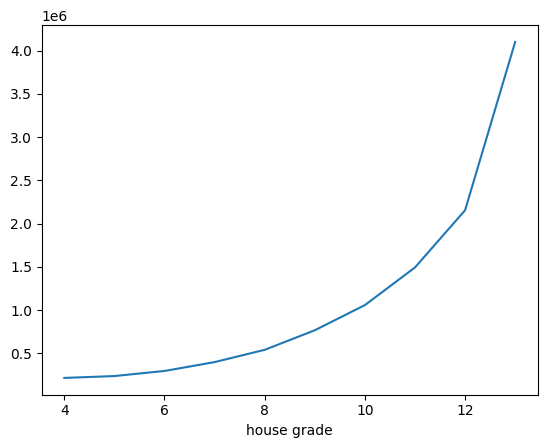

In [116]:
#house grade according to price
df.groupby("house grade")["Price"].mean().sort_values().plot()

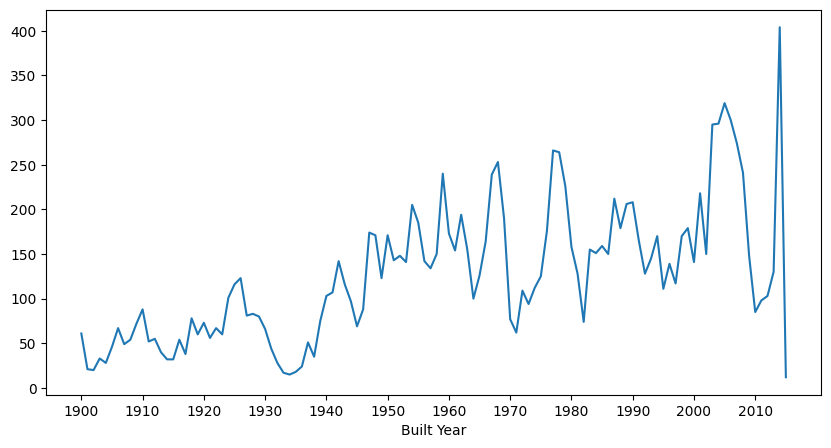

In [117]:
#yearwise house count time series
plt.figure(figsize=(10,5))
df["Built Year"].value_counts().sort_index().plot()
plt.xticks(np.arange(1900,2016,10))
plt.show()

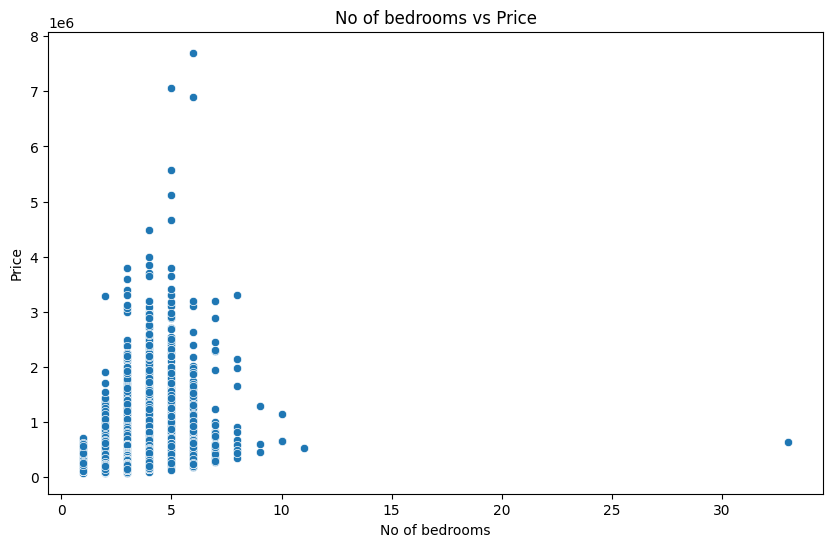

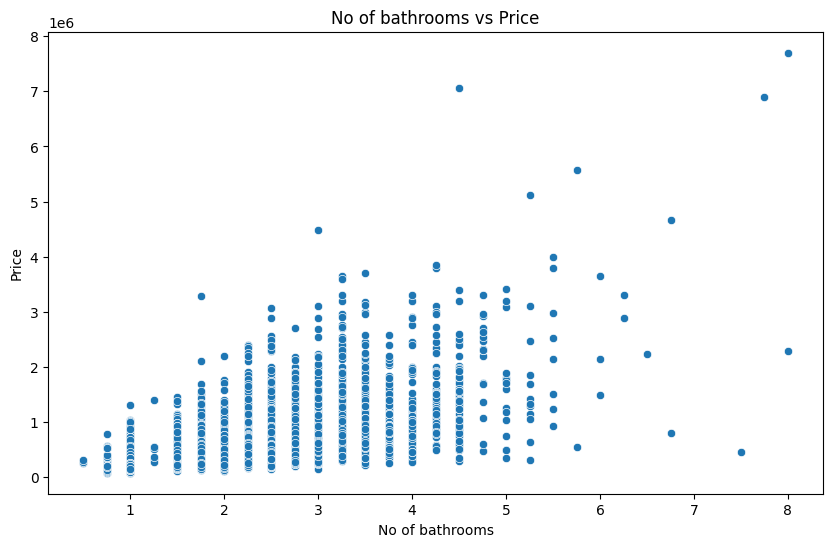

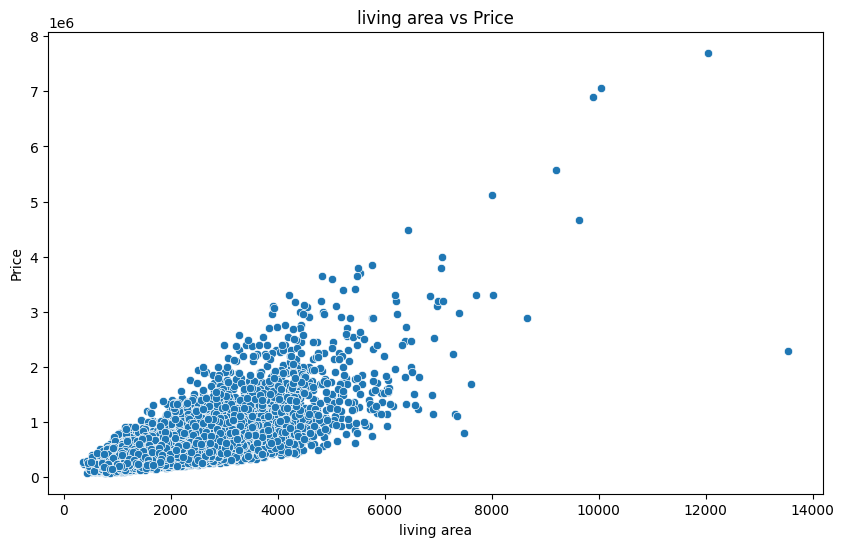

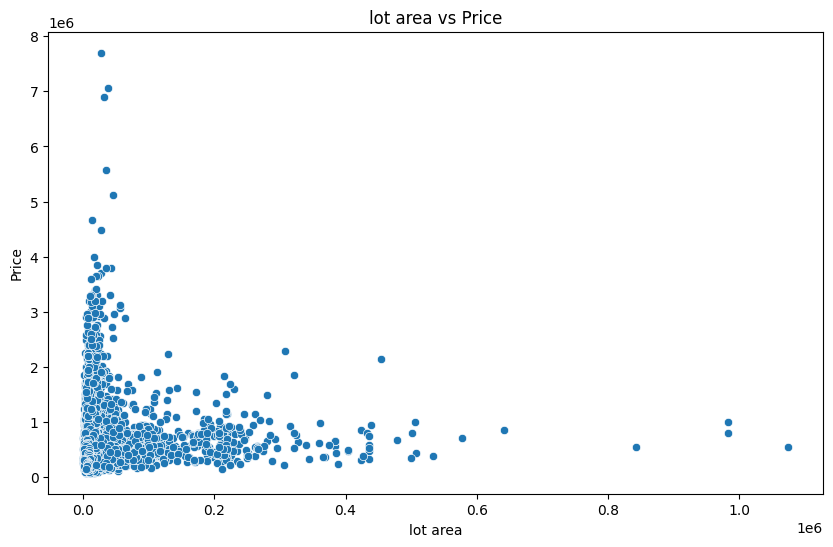

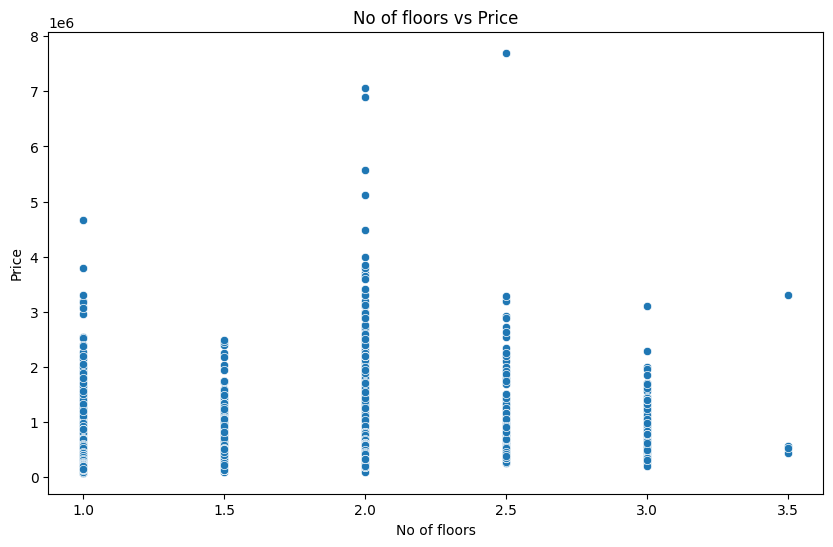

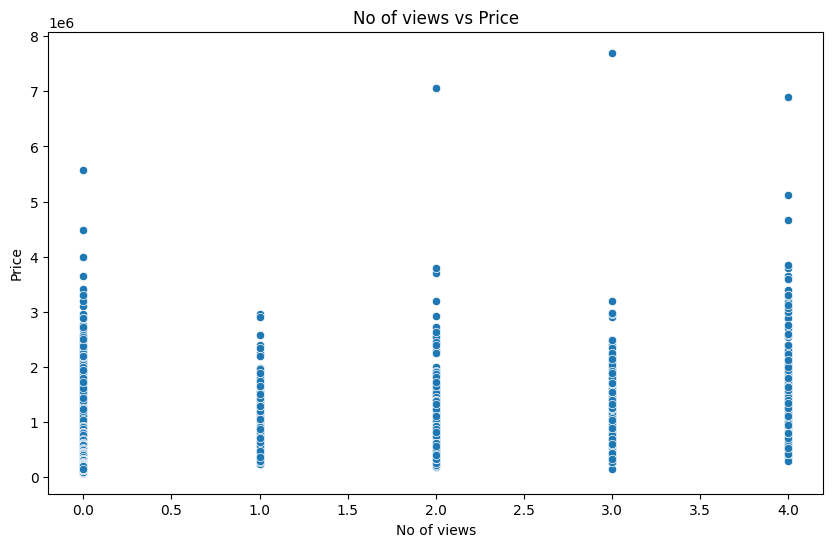

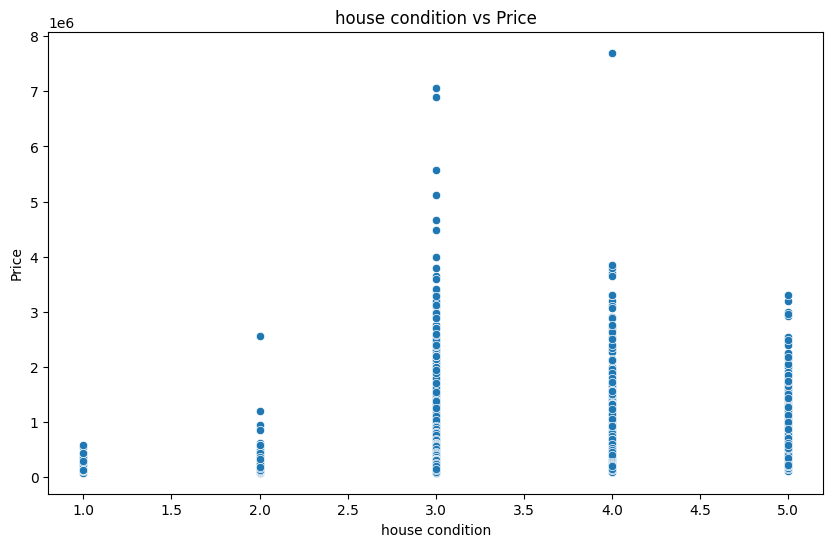

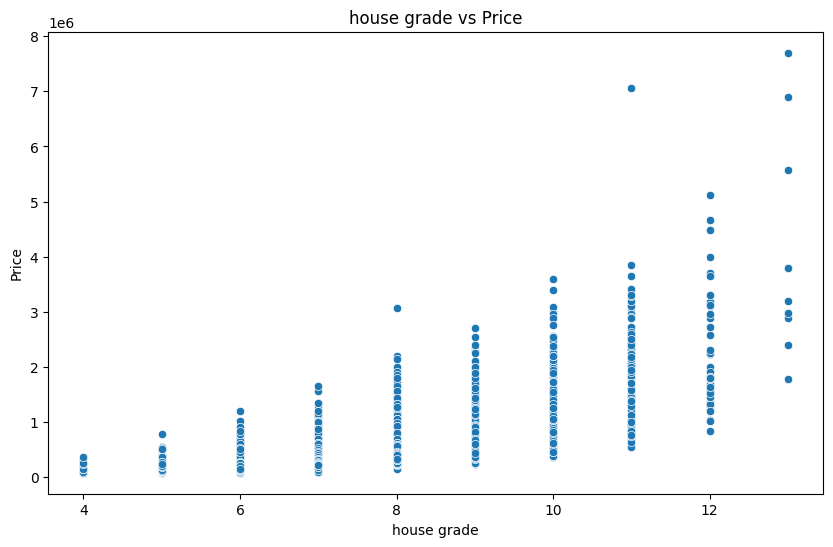

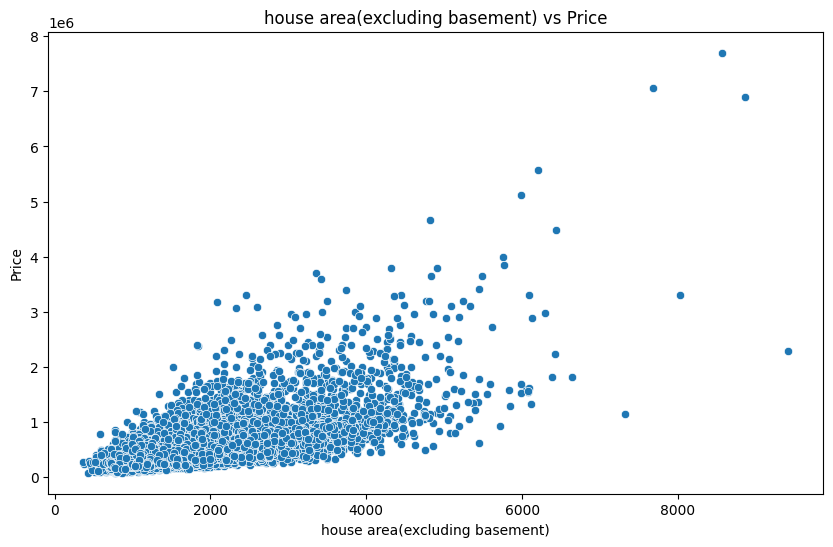

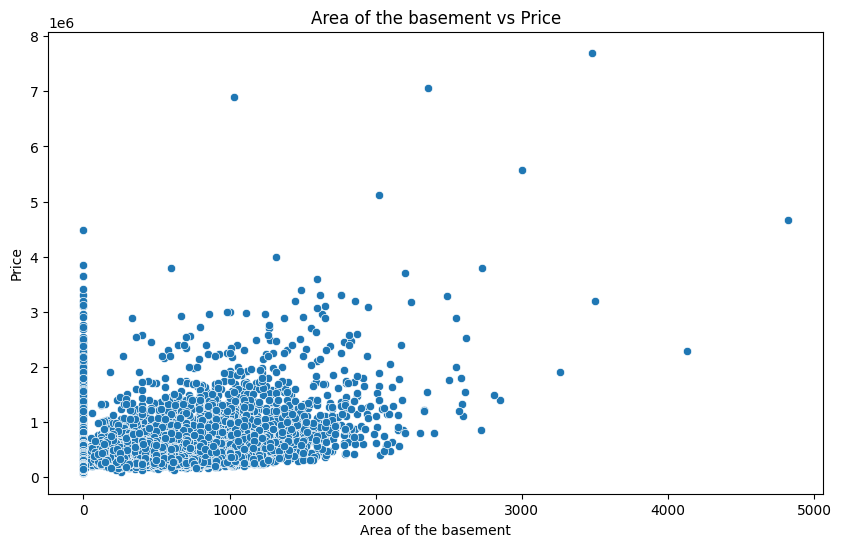

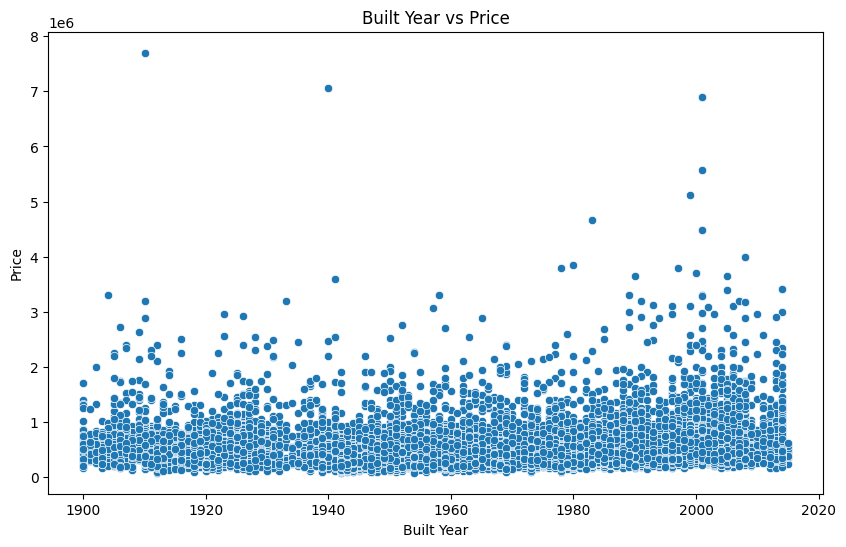

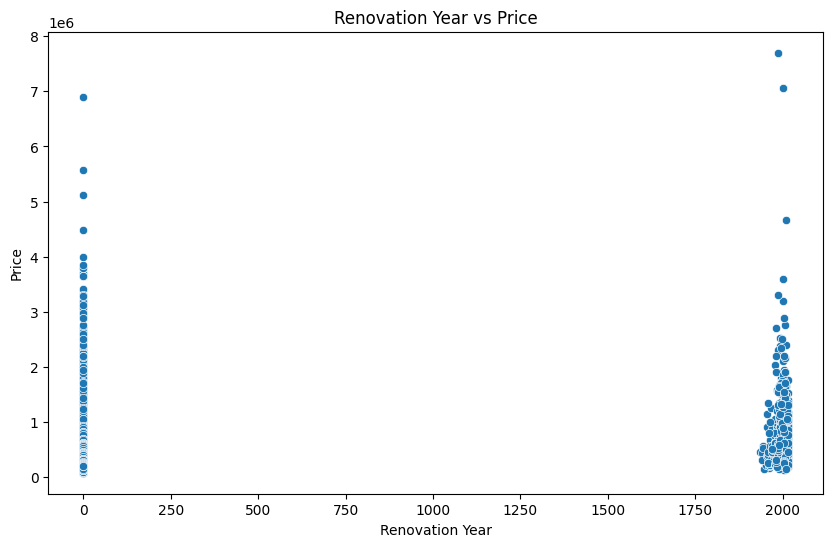

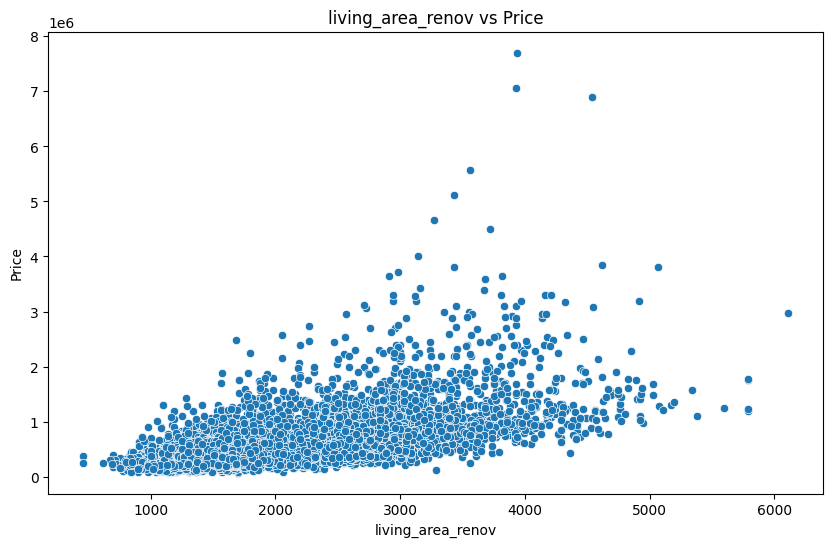

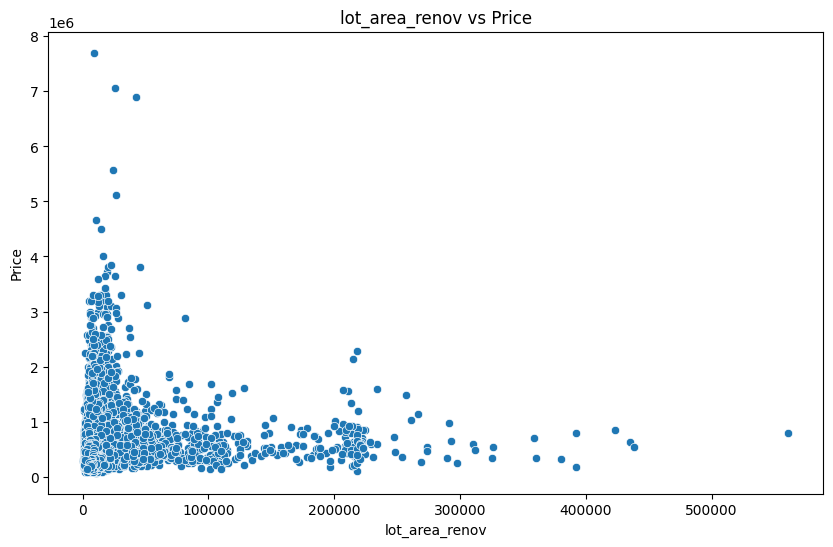

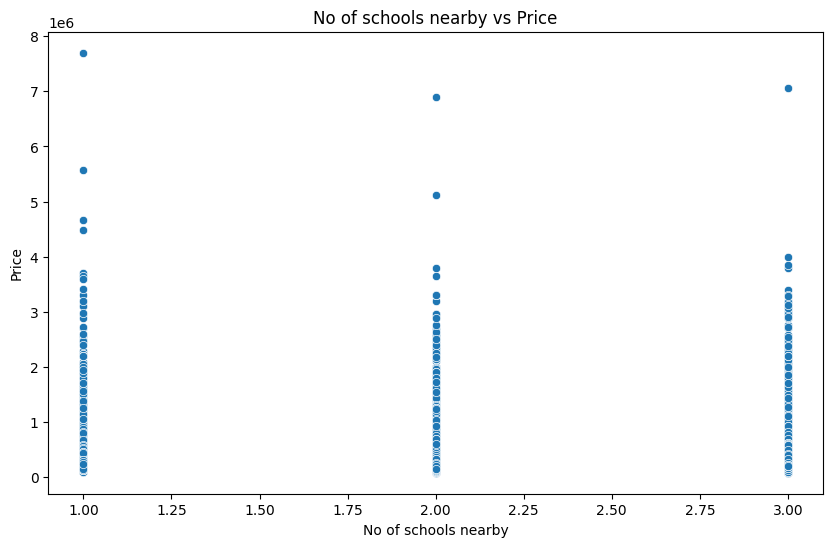

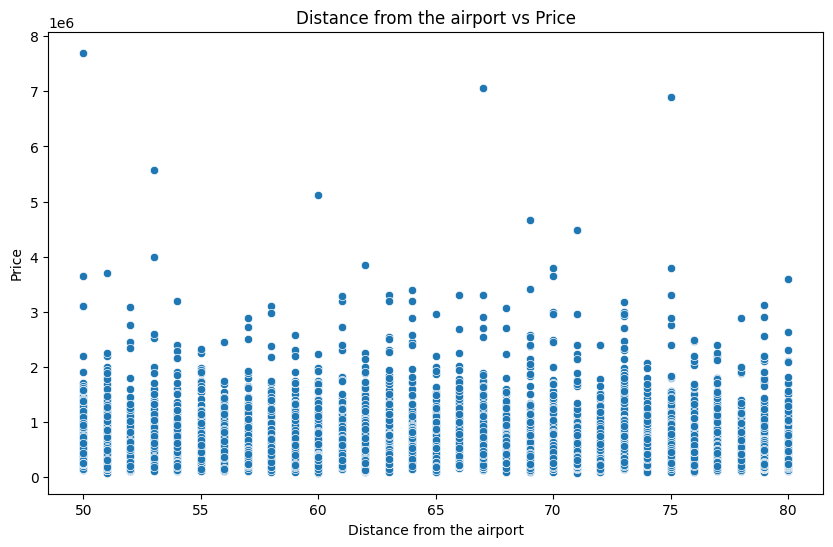

In [118]:
# Scatter plots for each numerical feature against Price
num_features = ['No of bedrooms', 'No of bathrooms', 'living area', 'lot area', 'No of floors',
                'No of views', 'house condition', 'house grade', 'house area(excluding basement)',
                'Area of the basement', 'Built Year', 'Renovation Year', 'living_area_renov',
                'lot_area_renov', 'No of schools nearby', 'Distance from the airport']

for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[feature], y=df['Price'])
    plt.title(f'{feature} vs Price')
    plt.show()


#House price heatmap on map using longitude and lattitude

In [119]:
# Define the center of the map as the mean latitude and longitude of the data
map_center = [df['Lattitude'].mean(), df['Longitude'].mean()]

# Create a map centered around the mean latitude and longitude
heatmap = folium.Map(location=map_center, zoom_start=10)

# Prepare the heatmap data
heat_data = [[row['Lattitude'], row['Longitude'], row['Price']] for index, row in df.iterrows()]

# Add the heatmap to the map
HeatMap(heat_data).add_to(heatmap)

# Save the map as an HTML file
heatmap.save('house_price_heatmap.html')

# Display the map in the notebook (if applicable)
heatmap

In [120]:
#drop unnecessary columns
df = df.drop(labels=['id','Date',],axis = 1)

##correlation of all columns

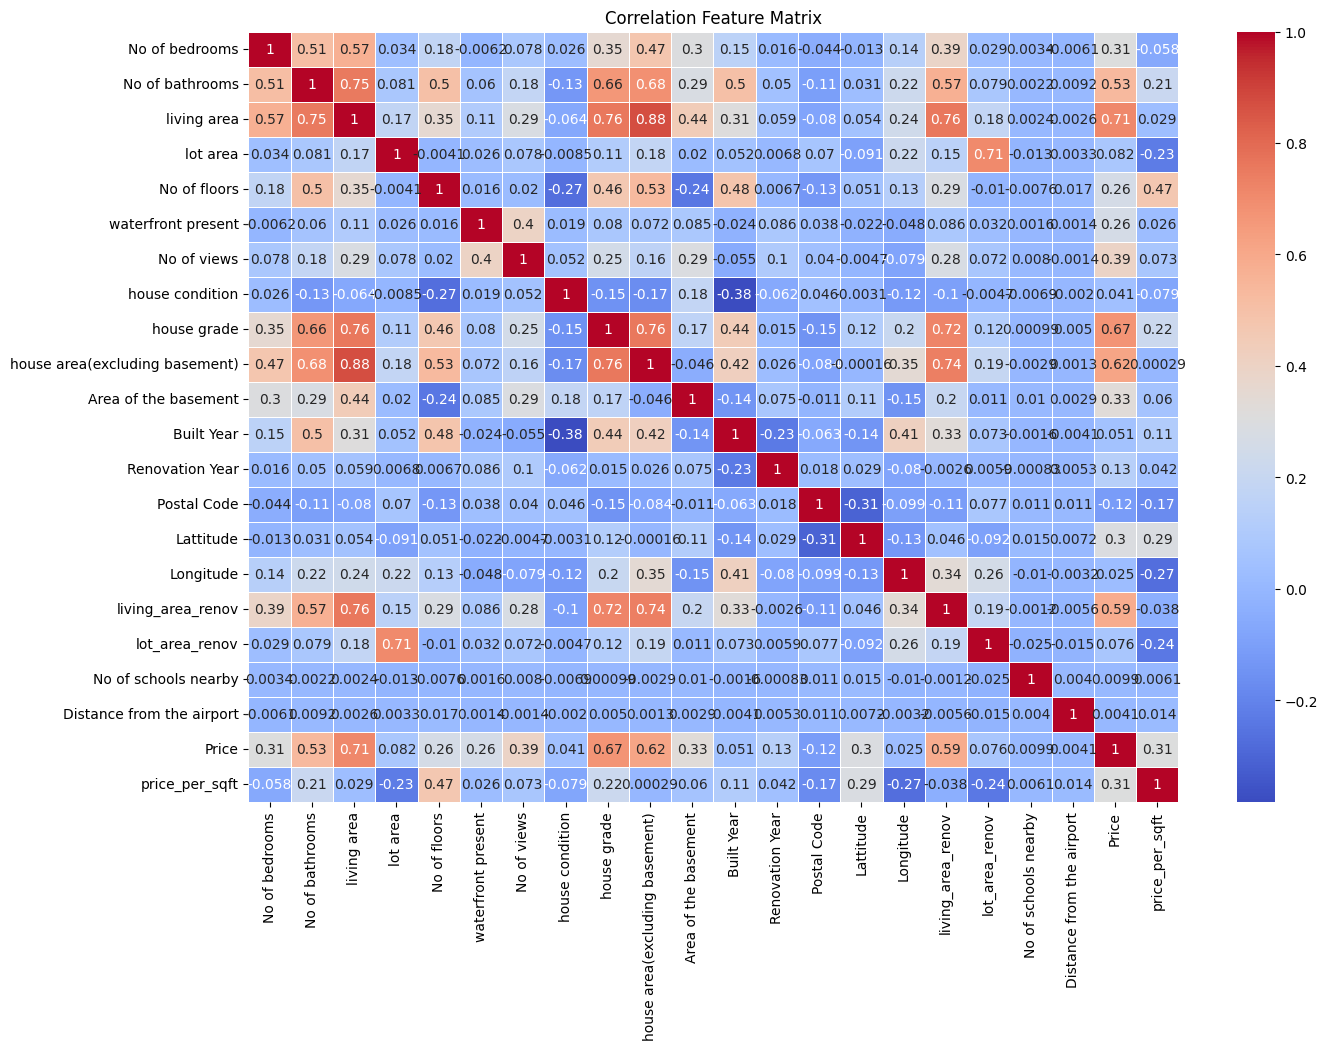

In [121]:
#correlation between the column that affecty on house price
corr =df.corr()
fig, ax = plt.subplots(figsize=(15,10))
# Draw the heatmap with the correlation matrix
sns.heatmap(corr,annot=True,linewidths=.5,ax=ax,cmap='coolwarm')
plt.title('Correlation Feature Matrix')
plt.show()

#correlation of Price with all feature

<Axes: >

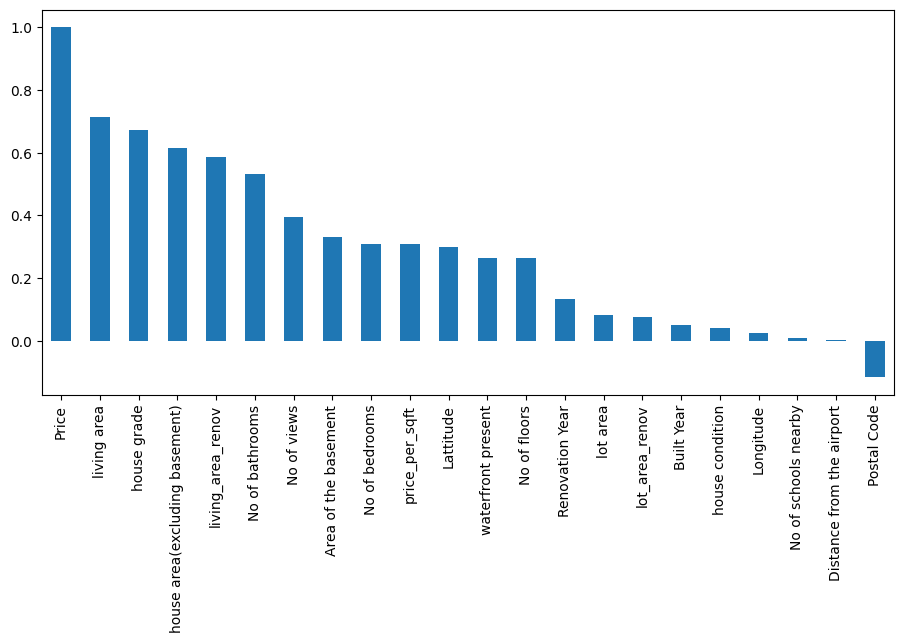

In [122]:
plt.figure(figsize= (11,5))
corr['Price'].sort_values(ascending= False).plot(kind = "bar")

In [123]:
df.columns

Index(['No of bedrooms', 'No of bathrooms', 'living area', 'lot area',
       'No of floors', 'waterfront present', 'No of views', 'house condition',
       'house grade', 'house area(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'No of schools nearby', 'Distance from the airport', 'Price',
       'price_per_sqft'],
      dtype='object')

In [124]:
# address like logitude , lattitude and postal_code unncessary for model
df=df.drop(labels=['Postal Code','Lattitude','Longitude'],axis=1)

##Building model to predict Price

In [125]:
# List of categorical columns if any need to convert numerical category
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns

[]

##Split the datset in to train and test dataset

In [126]:
#Storing the Data into X and target into y
X = df.drop('Price', axis = 1)
y = df['Price']

In [127]:
#Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

##Apply different model on train dataset then find accuracy with test dataset

##1. Linear Regression

In [128]:
#1. Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [129]:
#predict
y_pred = model.predict(X_test)

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [131]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R Squared: {r2:.2f}")

Mean Squared Error: 42105663941.79
Mean Absolute Error: 122084.59
Root Mean Squared Error: 205196.65
R Squared: 0.71


##2. Random Forest

In [132]:
#2. Random Forest
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

RandomForestRegressor()

In [133]:
#predict use this model
y_pred_rf= model2.predict(X_test)

In [134]:
#compare the prediction with test data
mse2 = mean_squared_error(y_test, y_pred_rf)
mae2= mean_absolute_error(y_test, y_pred_rf)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y_test,y_pred_rf)
print(f"Mean Squared Error: {mse2:.2f}")
print(f"Mean Absolute Error: {mae2:.2f}")
print(f"Root Mean Squared Error: {rmse2:.2f}")
print(f"R Squared: {r22:.2f}")

Mean Squared Error: 10795421157.45
Mean Absolute Error: 33890.05
Root Mean Squared Error: 103901.02
R Squared: 0.93


##3. Gradient Boosting

In [135]:
#3. Gradient Boosting
model3 = GradientBoostingRegressor()
model3.fit(X_train, y_train)

GradientBoostingRegressor()

In [136]:
#predict use this model
y_pred_gb= model3.predict(X_test)

In [137]:
#compare data between the test data and predict datset
mse3 = mean_squared_error(y_test, y_pred_gb)
mae3 = mean_absolute_error(y_test, y_pred_gb)
rmse3 = np.sqrt(mse3)
r23 = r2_score(y_test, y_pred_gb)

print(f"Mean Squared Error: {mse3:.2f}")
print(f"Mean Absolute Error: {mae3:.2f}")
print(f"Root Mean Squared Error: {rmse3:.2f}")
print(f"R Squared: {r23:.2f}")

Mean Squared Error: 10072901721.12
Mean Absolute Error: 56926.69
Root Mean Squared Error: 100363.85
R Squared: 0.93


##4. XG Boost Regression

In [138]:
#4. XG Boost Regression
model4 = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=100,learning_rate=0.1,max_depth=6,subsample=0.8,colsample_bytree=0.8,random_state=42)
model4.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [139]:
#predict the data
y_pred_xg = model4.predict(X_test)

In [140]:
mse4 = mean_squared_error(y_test, y_pred_xg)
mae4 = mean_absolute_error(y_test, y_pred_xg)
rmse4 = np.sqrt(mse4)
r24 = r2_score(y_test, y_pred_xg)

print(f"Mean Squared Error: {mse4:.2f}")
print(f"Mean Absolute Error: {mae4:.2f}")
print(f"Root Mean Squared Error: {rmse4:.2f}")
print(f"R Squared: {r24:.2f}")

Mean Squared Error: 5787092575.44
Mean Absolute Error: 33036.90
Root Mean Squared Error: 76072.94
R Squared: 0.96


#5.Decision Tree Regression

In [141]:
model5 = DecisionTreeRegressor()
model5.fit(X_train, y_train)

DecisionTreeRegressor()

In [142]:
#predict use this model
y_pred_dt= model5.predict(X_test)

In [143]:
#mse, mae, rmse,r2_score check on this model on test data
mse5 = mean_squared_error(y_test, y_pred_dt)
mae5 = mean_absolute_error(y_test, y_pred_dt)
rmse5 = np.sqrt(mse5)
r25 = r2_score(y_test, y_pred_dt)

print(f"Mean Squared Error: {mse5:.2f}")
print(f"Mean Absolute Error: {mae5:.2f}")
print(f"Root Mean Squared Error: {rmse5:.2f}")
print(f"R Squared: {r25:.2f}")

Mean Squared Error: 20677672179.12
Mean Absolute Error: 51997.07
Root Mean Squared Error: 143797.33
R Squared: 0.86


##6- Support Vector Regression

In [144]:
model6 = SVR()
model6.fit(X_train, y_train)

SVR()

In [145]:
#predict use this model
y_pred_svr= model6.predict(X_test)

In [146]:
#mse, mae, rmse,r2_score check on this model on test data
mse6 = mean_squared_error(y_test, y_pred_svr)
mae6 = mean_absolute_error(y_test, y_pred_svr)
rmse6 = np.sqrt(mse6)
r26 = r2_score(y_test, y_pred_svr)

print(f"Mean Squared Error: {mse6:.2f}")
print(f"Mean Absolute Error: {mae6:.2f}")
print(f"Root Mean Squared Error: {rmse6:.2f}")
print(f"R Squared: {r26:.2f}")

Mean Squared Error: 154708852563.79
Mean Absolute Error: 223642.36
Root Mean Squared Error: 393330.46
R Squared: -0.05


##7. K-Nearest Neighbors Regressor

In [147]:
#KNN(K-Nearest Neighbors Regressor)
model7 = KNeighborsRegressor()
model7.fit(X_train, y_train)

KNeighborsRegressor()

In [148]:
#predict use this model
y_pred_knn= model7.predict(X_test)

In [149]:
#mse, mae, rmse,r2_score check on this model on test data
mse7 = mean_squared_error(y_test, y_pred_knn)
mae7 = mean_absolute_error(y_test, y_pred_knn)
rmse7 = np.sqrt(mse7)
r27 = r2_score(y_test, y_pred_knn)

print(f"Mean Squared Error: {mse7:.2f}")
print(f"Mean Absolute Error: {mae7:.2f}")
print(f"Root Mean Squared Error: {rmse7:.2f}")
print(f"R Squared: {r27:.2f}")

Mean Squared Error: 71283200047.51
Mean Absolute Error: 154817.37
Root Mean Squared Error: 266989.14
R Squared: 0.51


so from this as we know that xgboosting is better model to predict price of house

In [162]:
#save final dataset to use
df.to_csv('final_House_price_dataset.csv', index=False)

##Saving the best model

In [157]:
#saving the best model suited for prediction house price
import pickle
pickle.dump(model4, open('house_price_model.pkl', 'wb'))